# Illustration of Confidence Intervals

**Example 4.1. Illustration of Confidence Intervals.** 
Assume a sample of N= 31 independent observations are collected 
from a normally distributed random variable x with the following results:

    60, 61, 47, 56, 61, 63, 
    65, 69, 54, 59, 43, 61, 
    55, 61, 56, 48, 67, 65, 
    60, 58, 57, 62, 57, 58, 
    53, 59, 58, 61, 67, 62, 54

Determine a 90% confidence interval for the mean value and variance of the random variable x.

## Solution
Let's go to chapter 4 (Statistical Principals), section 4 (**Confidence Intervals**) of J. Bendat, A Piersol.

In [1]:
from IPython.display import IFrame
IFrame('pdfs/J-Bendat--A-Piersol-random-data-analysis-and-measurement-procedures-section-4-4.pdf',
       width='100%', height=400)

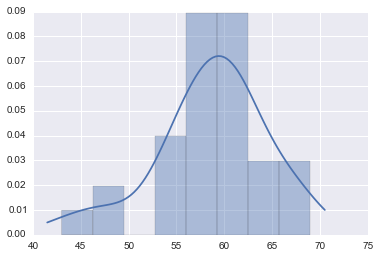

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline

# The data
X = np.array([60, 61, 47, 56, 61, 63, 65, 69, 54, 59, 43, 61, 55, 61,
              56, 48, 67, 65, 60, 58, 57, 62, 57, 58, 53, 59, 58, 61, 67, 62, 54])

# Let's visualize the distribution
sns.distplot(X)

In [2]:
# Number of data
N = float(len(X))

# We estimate the sample mean
mu = X.mean()

# We estimate the sample variance and standar deviation with N-1 degrees of freedom
s2 = X.var(ddof=1)
s = X.std(ddof=1)

# We print the values
print 'mean = %4.2f' % mu
print 's2 = %4.2f' % s2
print 's = %4.2f' % s


# We need to determine confidence intervals with 90% confidence
# 90% confidence means an alpha = 0.1
# The confidence intervals for μ_x are given by Eq. (4.46b)

# We need the t-student statistic for t(1-alpha/2,N-1)
t = stats.t.ppf(1-0.1/2,N-1) # ppf: percent point function (inverse of cdf)

# The confidence interval
conf_int_mu = (mu-t*s/np.sqrt(N),mu+t*s/np.sqrt(N))

print 'confidence interval for μ_x: (%2.2f < %2.2f < %2.2f)' % (conf_int_mu[0],mu,conf_int_mu[1])
# Another way to do it using stats.t.interval 
print 'confidence interval for μ_x: (%2.2f, %2.2f)' % stats.t.interval(1-0.1, N-1, loc=mu, scale=s/np.sqrt(N-1))

mean = 58.61
s2 = 33.45
s = 5.78
1.69726089436
confidence interval for μ_x: (56.85 < 58.61 < 60.38)
confidence interval for μ_x: (56.82, 60.40)


## Additional work 
1. Compute the 90% confidence interval for the variance $s^2_x$. Use Eq. (4.47) and the function [``stats.chi2.ppf()``.](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2 "scipy.stats.chi2 — SciPy v0.17.0 Reference Guide")
2. Compute the 95% confidence intervals for the mean $\mu_x$ and variance $s^2_x$.